In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data=pd. read_csv(r"F:\Python  coading\Employee-Attrition.csv")
pd.set_option('display.max_columns', None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

## INTRODUCTION OF PROJECT
TARGET COLUMN == ATTRITION

• ATTRITION---> Attrition is the departure of employees from the organization for any reason or in simple words we can say that employees who want to
leave the company.

• ATTRITION "YES" ----> Employee wants to leave the company.
• . ATTRITION "NO" -----> Erliployee don't want to leave.
WHAT WE ARE GOING TO DO IN THIS

. It will uncover the factors that lead to employee "attrition".

• In this project we are going to analyse that how other features of dataset is effecting "Attrition ".

In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## BASIC CHECKS


In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

• Here information tells us that there is no null values are present in data, so we need not to handle null values.

• However it can be seen that there are 9 features or columns which are of " object" data type, so we have to handle catagorical columns for our model
creation.

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


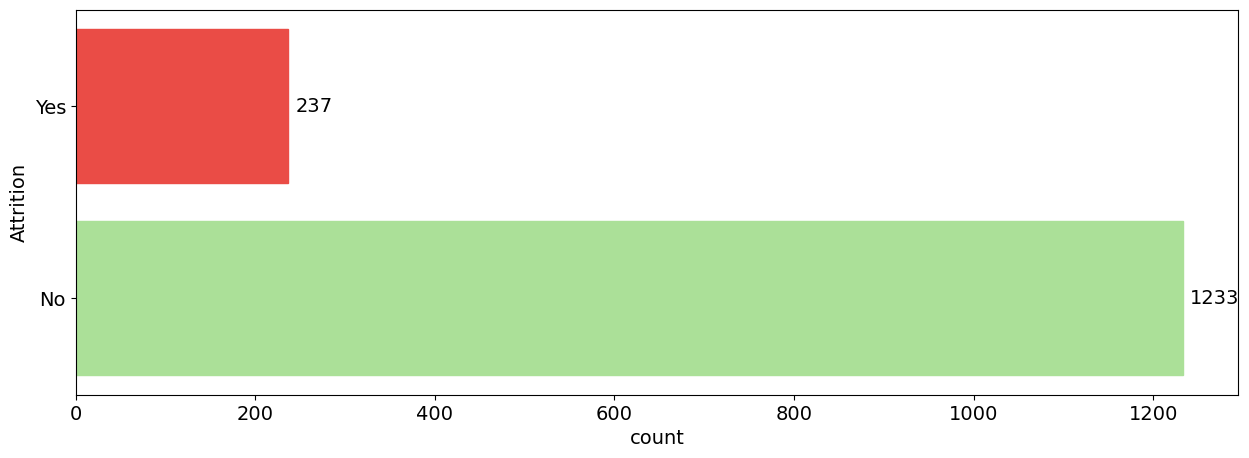

In [8]:
plt.figure(figsize=(15, 5))
plt.rc("font", size=14)

ax = sns.countplot(y='Attrition', data=data)

light_red = '#ABE098'  
light_green = '#EA4C46'

colors = [light_red if count < 500 else light_green for count in data['Attrition'].value_counts()]

for bar, color in zip(ax.patches, colors):
    bar.set_color(color)


for p in ax.patches:
    count = int(p.get_width()) 
    ax.annotate(f'{count}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()



# EDA( EXPLORATORY DATA ANALSIS)


## ANALYSIS ON CATAGORICAL COLUMNS W.R.T TARGET COLUMN(ATTRITION)
TARGET COLUMN == ATTRITION

• Data of Attrition says that it has more number of " No " values and less number of "Yes".

• It can be seen that there is big difference in counts of the values so we can say that it is IMBALANCE DATA.


### 1. IMPACT OF BUSINESS TRAVEL ON ATTRITION

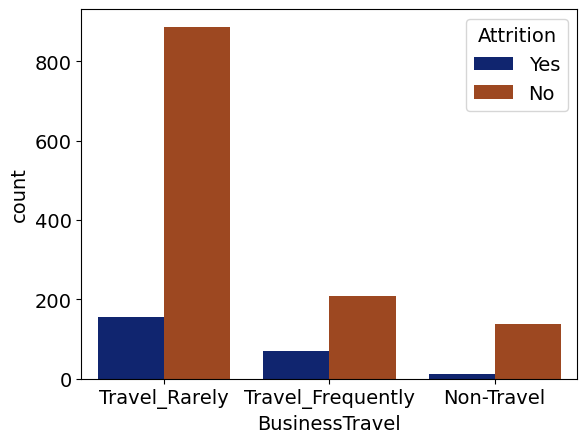

In [9]:
cmap = 'dark' 
sns.countplot(hue=data.Attrition, x=data.BusinessTravel, palette=cmap)
plt.show()

• Graph tells us that company has more count or more no. of employes who travels rarely. It means travel rate of company is less.

• There are more employes which travels rarely and are not satisfied with their job.

• Non-traveller have least count as well as least attrition.


### 2. IMPACT OF DEPARTMENT ON ATTRITION

(array([0, 1, 2]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Human Resources')])

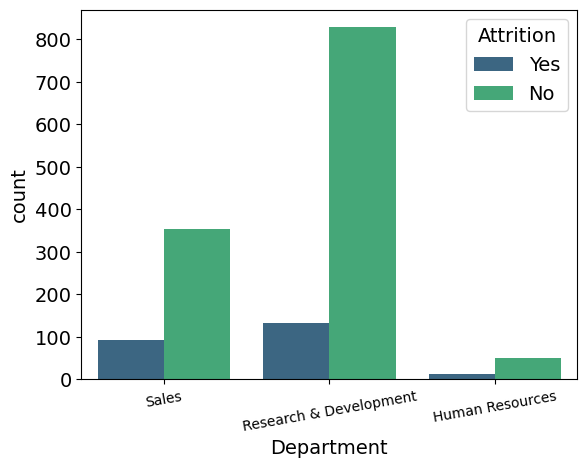

In [10]:
cmap='viridis'
ax = sns.countplot(x='Department', hue='Attrition', data=data,palette=cmap)
plt.xticks(rotation=10, fontsize=10)

• There are 3 no. of department are there -->1. Sales, 2. Research and Development, 3. HR department

• "Research and Development" department have more number of Attrition (150 employees) as compared to other two department.

• "HR Department" have least Attrition with just 5 to 10 employees.

### 3. GENDER AND ATTRITION

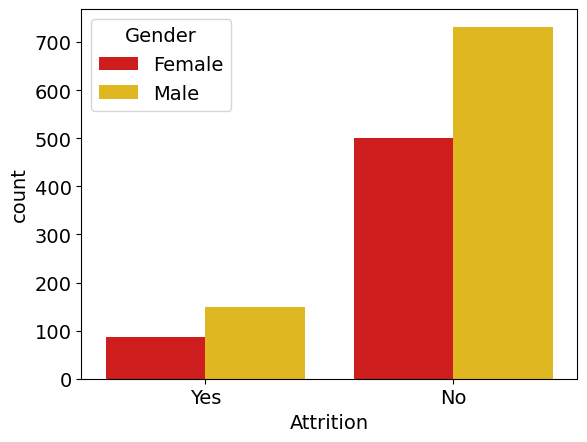

In [11]:
sns.countplot(x=data.Attrition, hue=data.Gender,palette='hot')
plt.show()

• Male employees are more as compared to Females

• Males are more likely to quit the job rather than Females.

### 4. OVERTIME AND ATTRITION

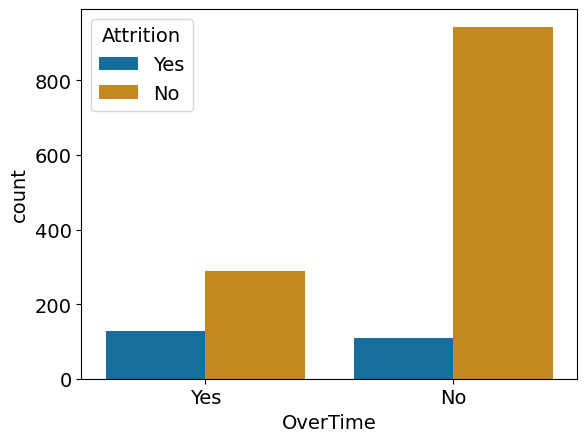

In [12]:
sns.countplot (hue=data.Attrition,x=data.OverTime,palette='colorblind')
plt.show()

• As for "Attrition yes", there is minor difference between the Employees who are doing overtime and who are not doing overtime.

• So we can say that Overtime feature is not much effecting Attrition.

• But we can conclude that most of employees are not doing overtime.

### 5. IMPACT OF JOB ROLE ON ATTRITION

Text(0.5, 0, 'JobRole')

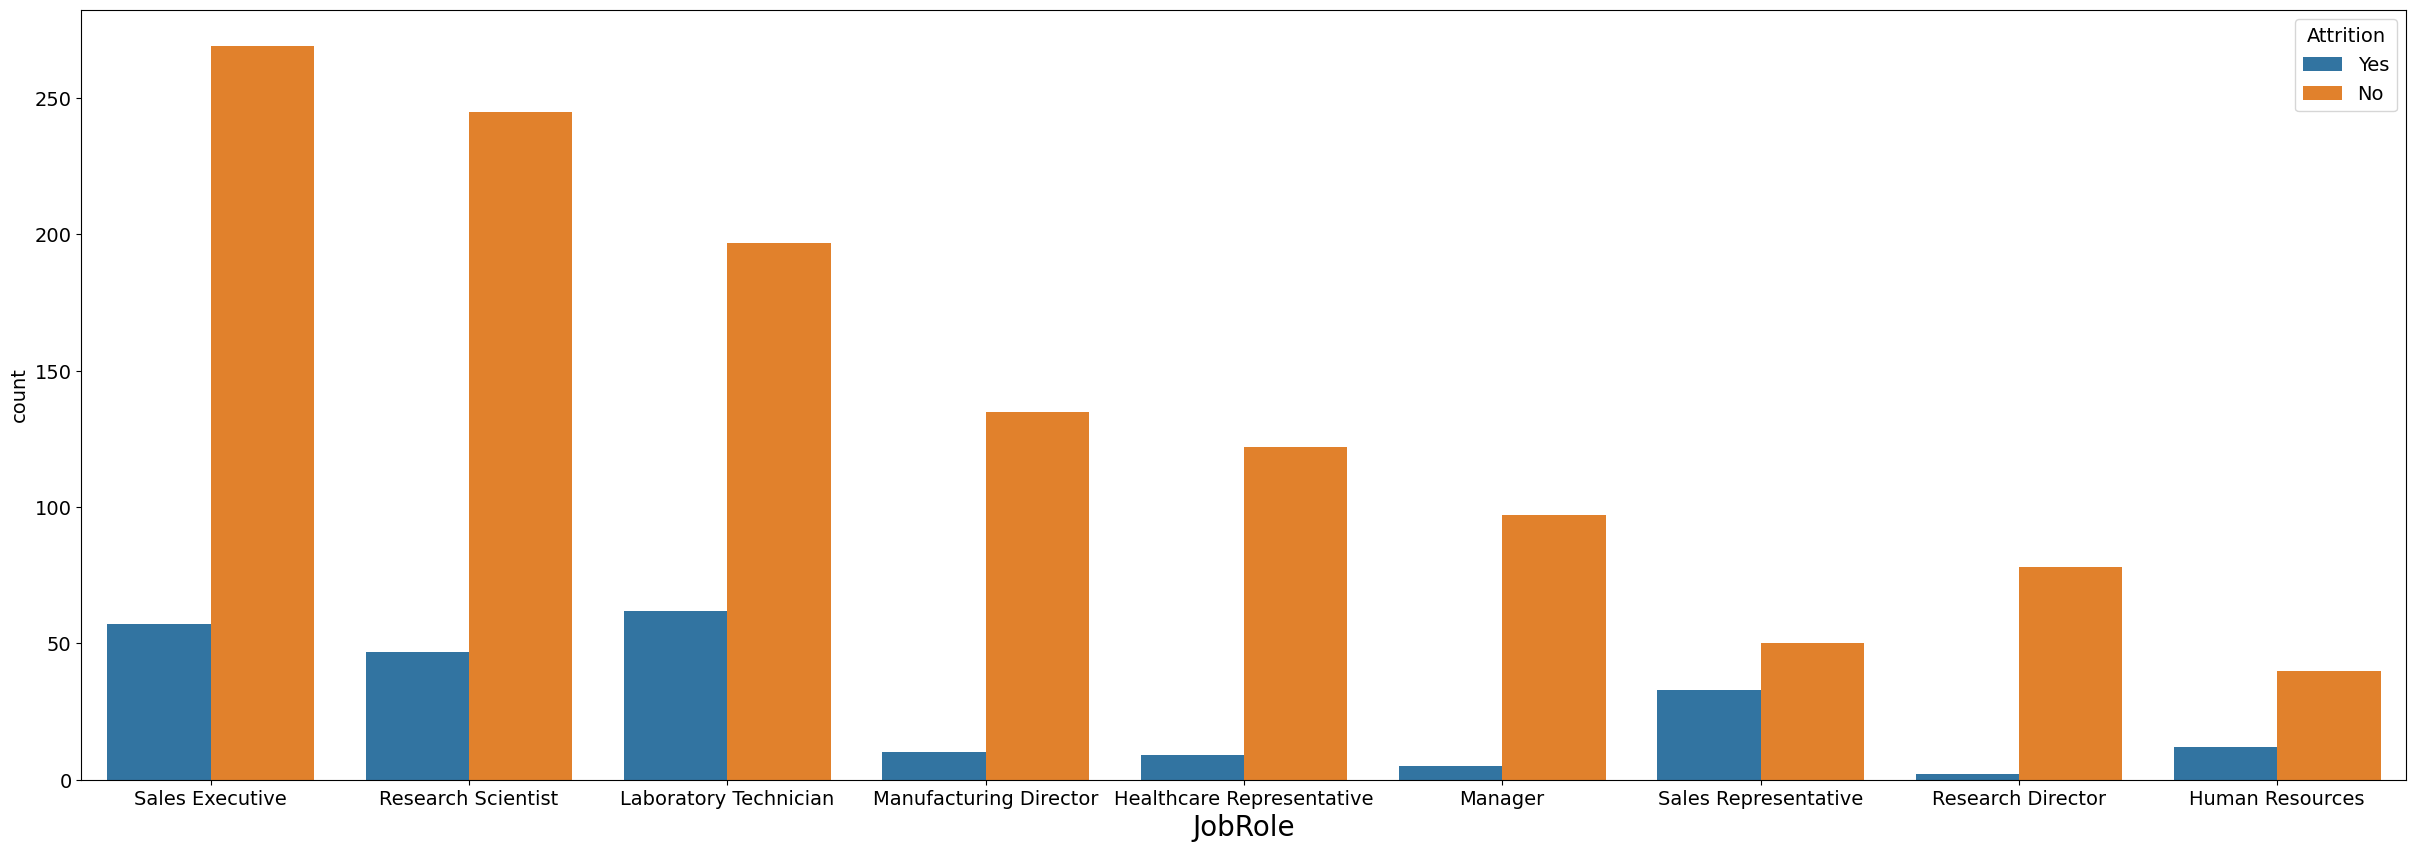

In [13]:
plt.figure(figsize=(30,10), facecolor='white')
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.xlabel('JobRole', fontsize=20)

• There are less no. of Research Director who leaves the company.

• Laboratory Technician, Sales Executive and Research Scientist are the top 3 job roles in which emloyees have thier Attrition "Yes".

• Apart from these it can also seen that there are more number of employees in Sales Executive job role.

### 6. IMPACT OF AGE ON ATTRITION

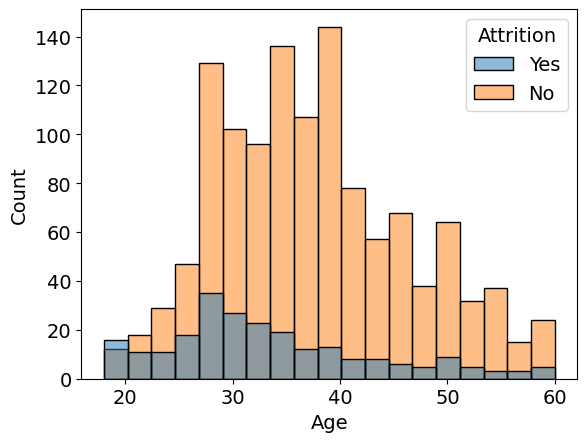

In [14]:
sns.histplot (hue=data.Attrition, x=data.Age)
plt.show()

• Employees in age of 25 to 35 are more likey to leave the job.

• After 40 age, the distribution tells us that " Higher the Age Lesser will be Attrition.
16

### 7. HOW SALARY HIKE IS IMPACTING THE ATTRITION

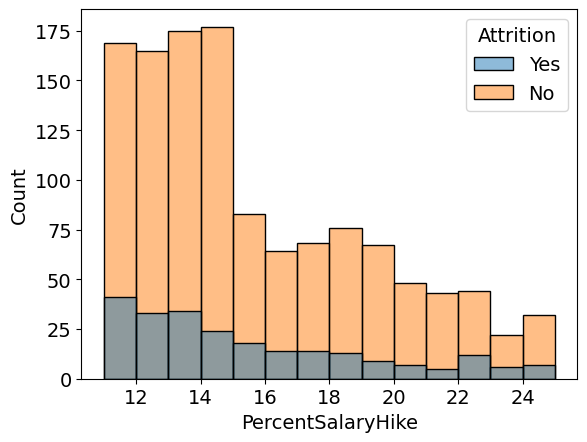

In [15]:
sns.histplot (hue=data.Attrition, x=data.PercentSalaryHike)
plt.show()

• Higher the salary prcentage hike, Lesser the Attririon ("No").

### 8. YEARS AT THE COMAPNY

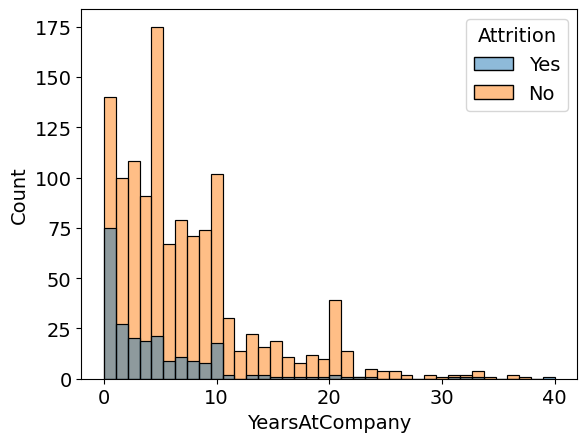

In [16]:
sns.histplot(x=data.YearsAtCompany, hue=data.Attrition)
plt.show()

• Freshers have higher data of "Attrition Yes" that is of 75 no. of workers or more than half of freshers.

• Apart from this Employees who ranges from 1 to 10 year working on this company are also likely to quit thier job.

### 9. IMPACT OF EMVIRONMENT AND JOB SATISFACTION ON ATTRITION

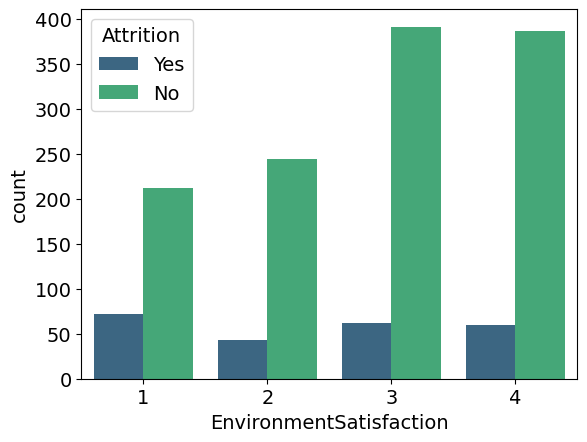

In [17]:
cmap='viridis'
sns.countplot (hue=data.Attrition,x=data.EnvironmentSatisfaction, palette=cmap)
plt.show()

• Increase in rate of Environment as well as Job Satisfaction gives rise to increase in Attrition " No "(means not willing to quit).

### 10. PERFORMANCE RATING AND ATTRITION

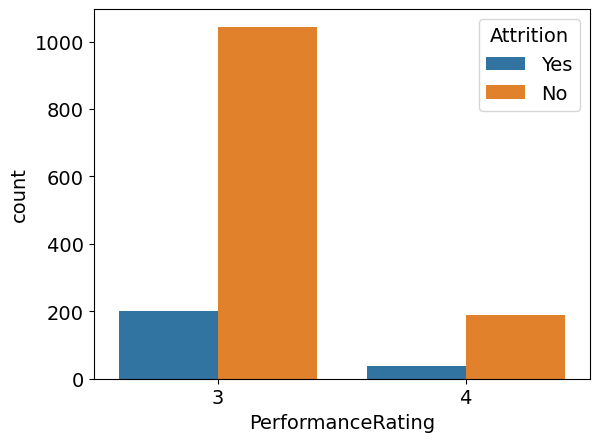

In [18]:
sns.countplot(x=data.PerformanceRating, hue=data.Attrition)
plt.show()

• on an average most of employees are moderately performed(because performance rating lines in 3-4) 

• However employees having less performance rating are more likely to quit or we can say that company wants to fire that employees

# DATA PRE-PROCESSING

In [19]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### CATAGORICAL DATA HANDLING

In [21]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [22]:
data.Attrition=data.Attrition.map({'Yes' :1, 'No' :0})

In [23]:
data.BusinessTravel=data.BusinessTravel.map({'Travel_Frequently' :1, 'Travel_Rarely' :2,'Non-Travel' :0})

In [24]:
data.Department=data.Department.map({ 'Research & Development' :2, 'Sales' :1, 'Human Resources' :0})

In [25]:
data.MaritalStatus=data.MaritalStatus.map({'Single' :2, 'Married' :1, 'Divorced' :0})

In [26]:
data.OverTime=data.OverTime.map( {"Yes" :1, "No" :0})

In [27]:
data.Gender=pd.get_dummies(data.Gender,drop_first=True)

In [28]:
data.JobRole=data.JobRole.map({'Laboratory Technician' :8, 'Sales Executive':7, 'Research Scientist' :6, 'Sales Representative' :5,
                               'Human Resources' :4, 'Manufacturing Director':3, 'Healthcare Representative' :2, 'Manager' :1,' Research Director' :0})

In [29]:
data.JobRole.isna().sum()

80

In [30]:
data['JobRole'] = data['JobRole'].fillna(data['JobRole'].mean())

In [31]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# FEATURE SELECTION

DROPING UNIQUE ONES

In [32]:
data.drop([ 'EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','EducationField'],axis=1, inplace=True)

In [33]:
data.shape

(1470, 30)

# MODEL CREATION

In [34]:
x=data.drop("Attrition", axis=1)
y=data["Attrition"]

## BALANCING THE TARGET COLUMN USING SMOTE

In [35]:
from collections import Counter
from imblearn.over_sampling import SMOTE
Sm=SMOTE()
print("unbalanced data: ", Counter(y))
x_Sm,y_Sm=Sm.fit_resample(x,y)
print("balanced data:  :", Counter(y_Sm))


unbalanced data:  Counter({0: 1233, 1: 237})
balanced data:  : Counter({1: 1233, 0: 1233})


## TRAIN-TEST-SPLIT

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_Sm,y_Sm,random_state=42,test_size=0.25)

## MODEL BUILDING

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

## PREDICTION

In [38]:
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [39]:
from sklearn.metrics import classification_report, accuracy_score,f1_score
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       311
           1       0.83      0.84      0.83       306

    accuracy                           0.83       617
   macro avg       0.83      0.83      0.83       617
weighted avg       0.83      0.83      0.83       617



### CHECKING DATA IS FULLY TRAINED OR NOT

In [40]:
train_pred=dt.predict(x_train)

In [41]:
print (classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       922
           1       1.00      1.00      1.00       927

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849



# RANDOM FOREST TECHNIQUE

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc=RandomForestClassifier(n_estimators=100)

In [44]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_prediction=rfc.predict(x_test)

In [46]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       311
           1       0.93      0.89      0.91       306

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.91      0.91      0.91       617

